## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [69]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')
file_path = 'Mall_Customers.csv'

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [70]:
customer_set = pd.read_csv(file_path)
customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

customer_set.head()


,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [71]:
attributes = customer_set.columns.tolist()
attributes


['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore']

In [72]:
dataset_shape = customer_set.shape
dataset_shape


(200, 5)

In [73]:
statistical_summary = customer_set.describe()
statistical_summary

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [74]:
nan_check = customer_set.isna().sum()
nan_check

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [75]:
customer_set.drop(columns=['CustomerID'], inplace=True)
customer_set.head()

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

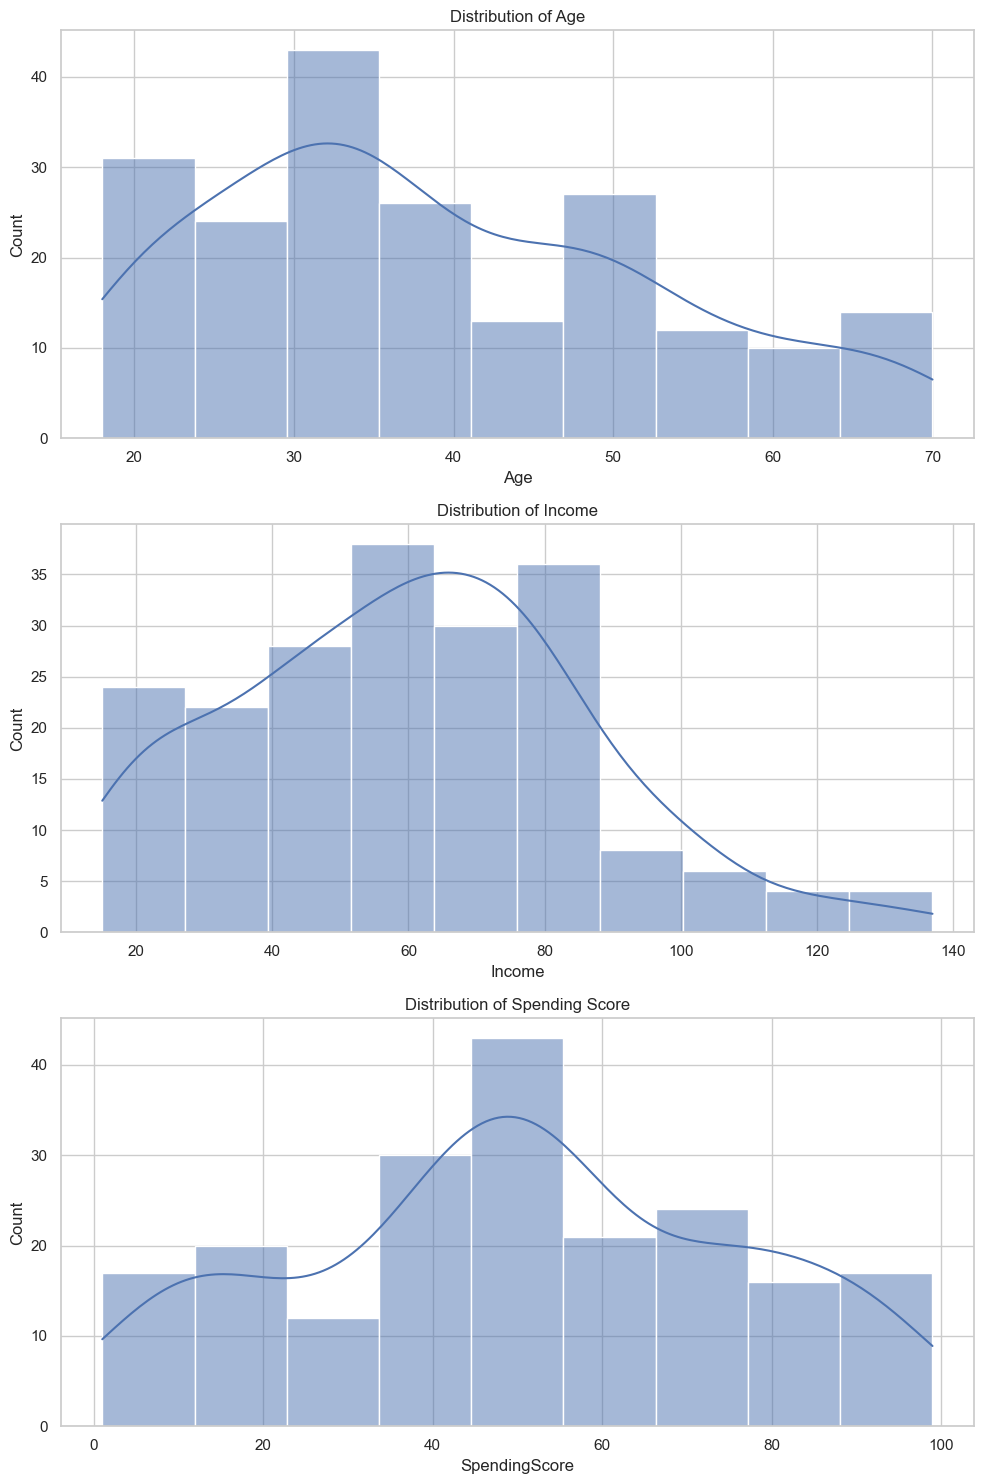

In [76]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data=customer_set, x='Age', kde=True, ax=axs[0])
axs[0].set_title('Distribution of Age')

sns.histplot(data=customer_set, x='Income', kde=True, ax=axs[1])
axs[1].set_title('Distribution of Income')

sns.histplot(data=customer_set, x='SpendingScore', kde=True, ax=axs[2])
axs[2].set_title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

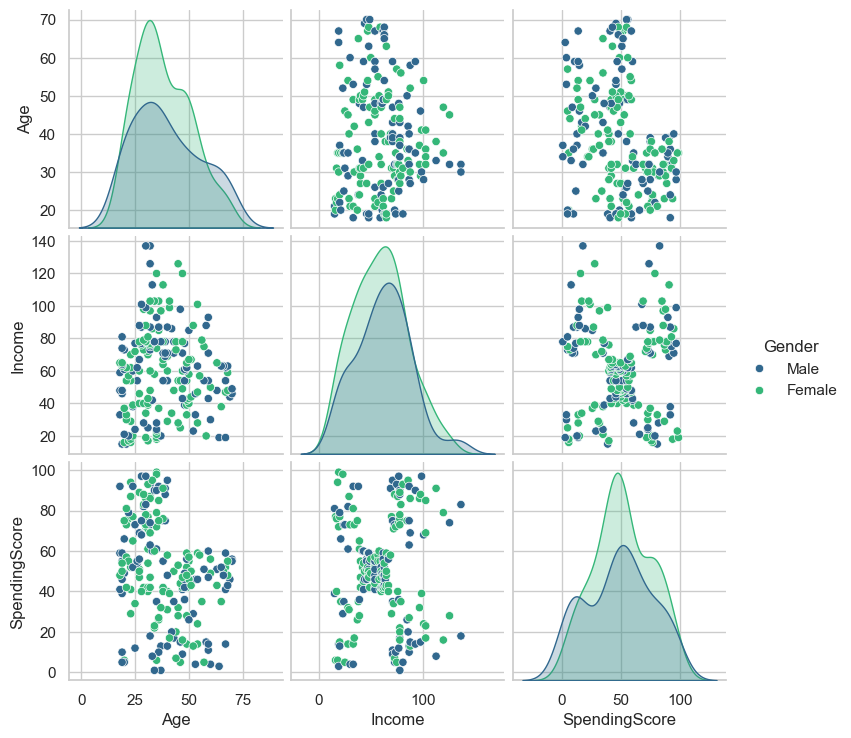

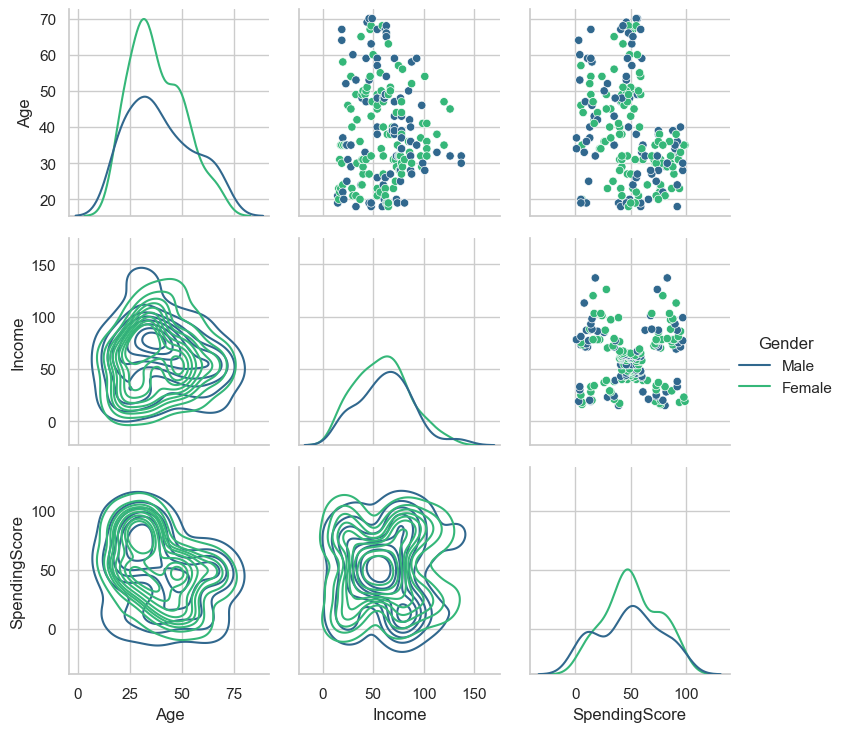

In [77]:
sns.set(style="whitegrid")
pairplot1 = sns.pairplot(customer_set, hue="Gender", palette="viridis")
plt.show()

pairgrid = sns.PairGrid(customer_set, hue="Gender", palette="viridis")
pairgrid.map_upper(sns.scatterplot) 
pairgrid.map_diag(sns.kdeplot)     
pairgrid.map_lower(sns.kdeplot, lw=1) 
pairgrid.add_legend()  
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Датасет Mall_Customers містить повну інформацію без пропущених значень, що полегшує подальший аналіз. Дані включають 200 записів і 5 атрибутів, що дозволяють аналізувати покупців за різними характеристиками, такими як стать, вік, дохід, і витрати. Статистичний аналіз виявляє, що середній вік клієнтів становить близько 39 років, а середній дохід приблизно 61 тисяча доларів. Середнє значення балів витрат є 50 з максимальним відхиленням до 100
2. Видалення змінної, яка не впливає на аналіз
3. Чоловіки та жінки майже однаково представлені у датасеті, з невеликою перевагою чоловіків в деяких вікових групах. Діаграми розсіювання показують, що немає виразної відмінності між статтями щодо річного доходу і оцінки витрат. Контурні графіки (kdeplot) вказують на деяку концентрацію вищих оцінок витрат серед молодших вікових груп. Жінки мають трохи більш високі оцінки витрат у порівнянні з чоловіками. Як чоловіки, так і жінки показують зниження рівня витрат з віком, особливо після 40 років.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender
Female    112
Male       88
Name: count, dtype: int64


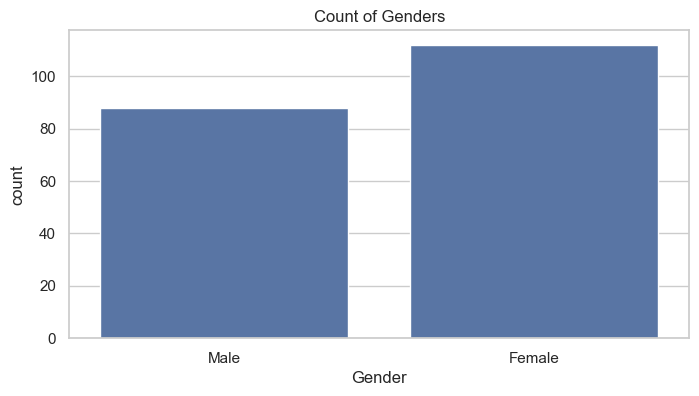

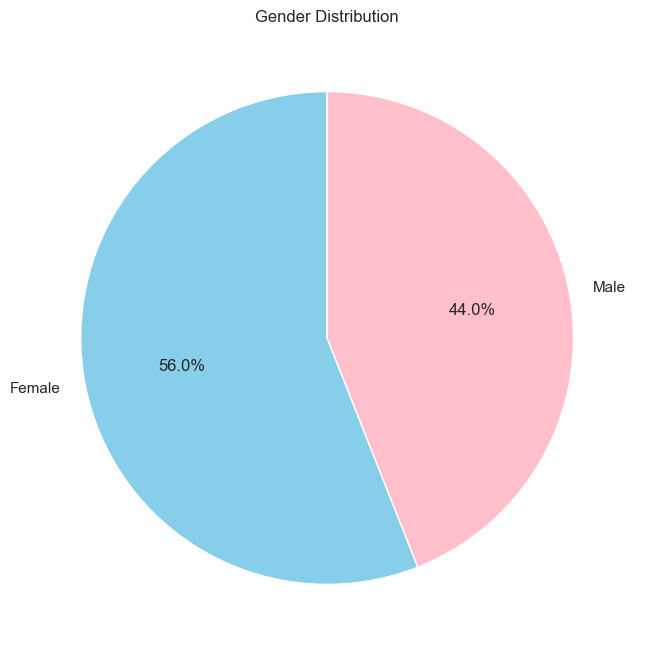

In [78]:
gender_counts = customer_set['Gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=customer_set)
plt.title('Count of Genders')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

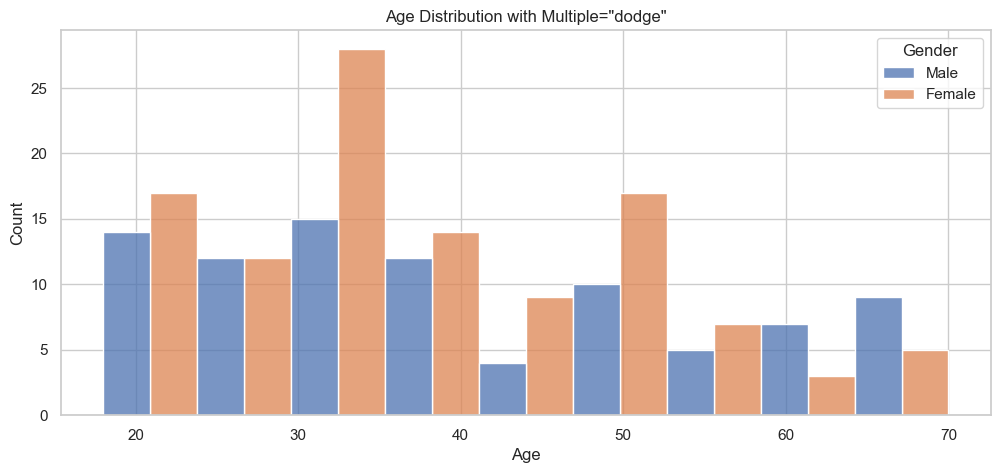

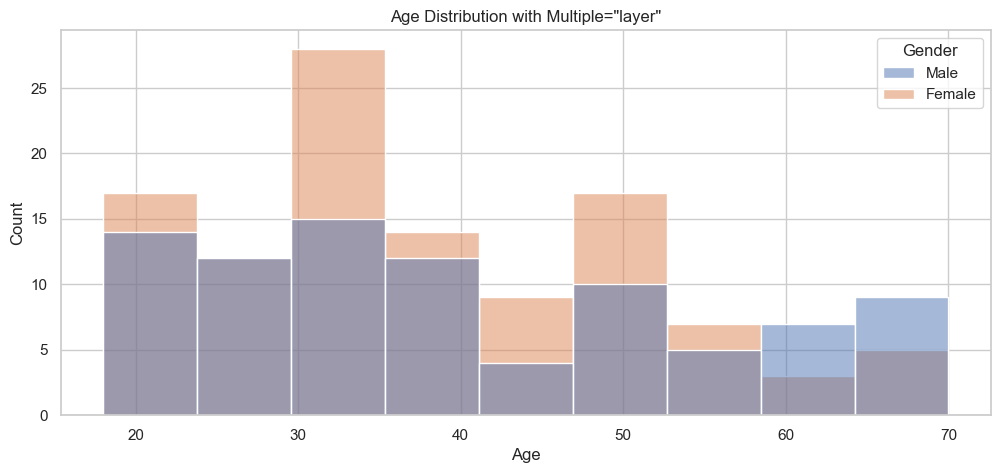

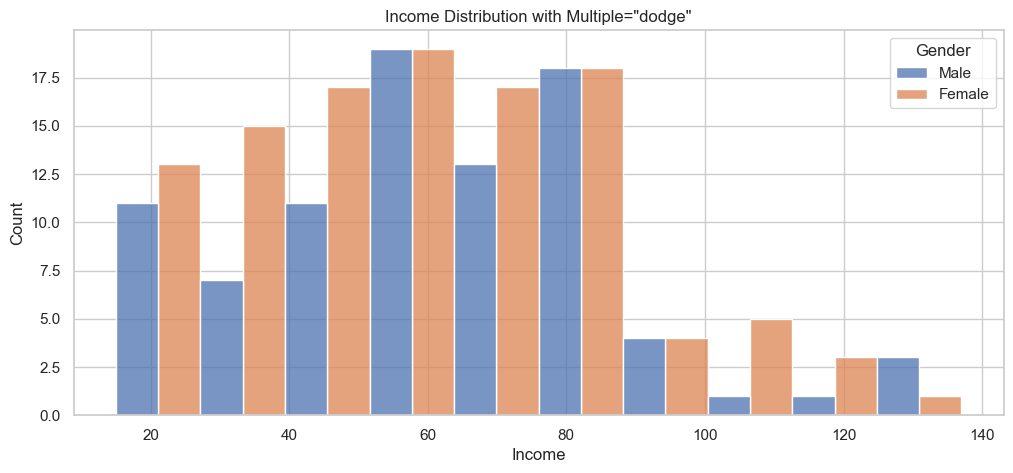

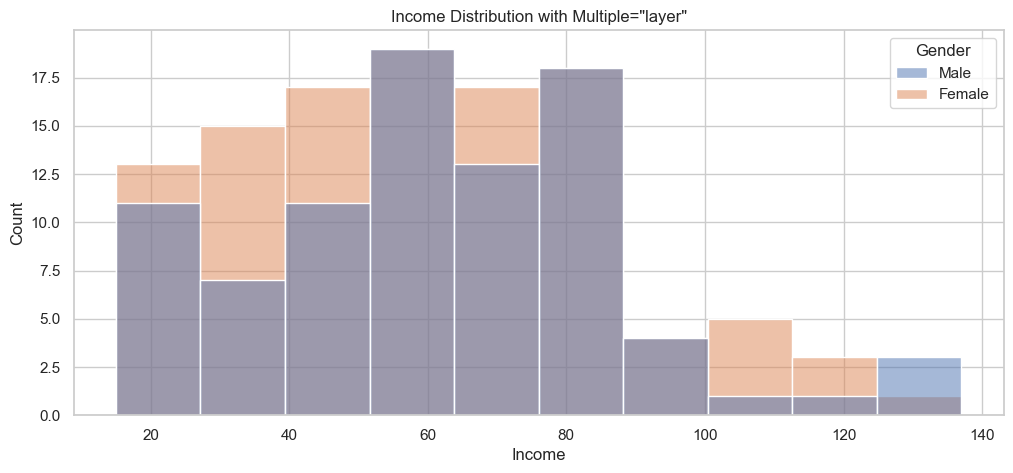

In [79]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', kde=False)
plt.title('Age Distribution with Multiple="dodge"')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', kde=False)
plt.title('Age Distribution with Multiple="layer"')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', kde=False)
plt.title('Income Distribution with Multiple="dodge"')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', kde=False)
plt.title('Income Distribution with Multiple="layer"')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



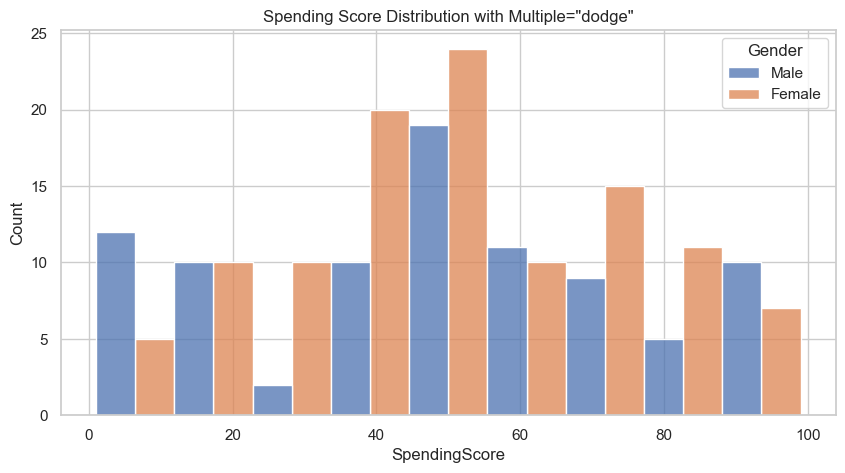

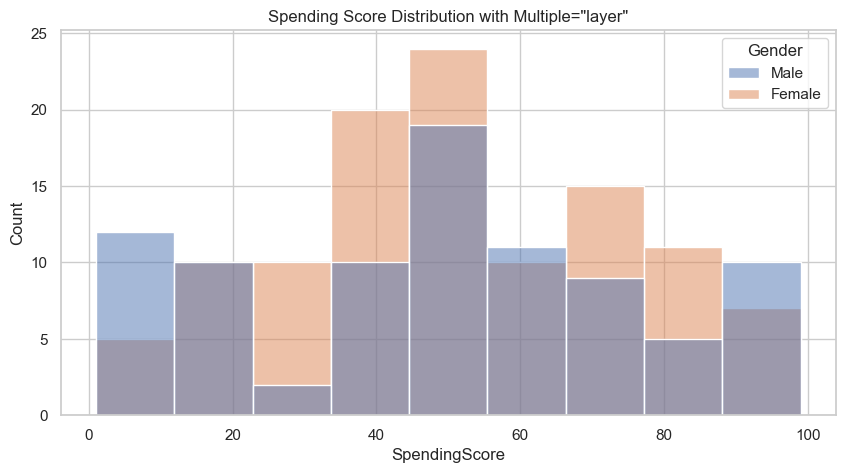

In [80]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', kde=False)
plt.title('Spending Score Distribution with Multiple="dodge"')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', kde=False)
plt.title('Spending Score Distribution with Multiple="layer"')
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

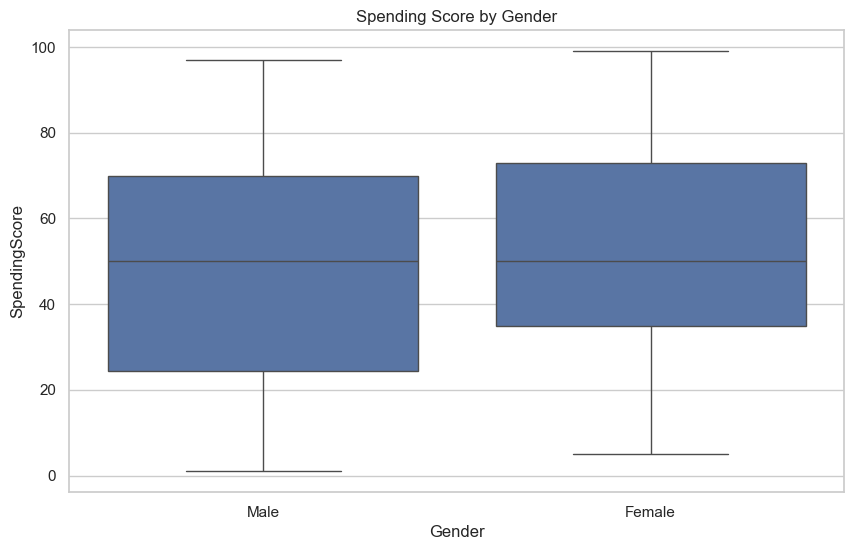

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set)
plt.title('Spending Score by Gender')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1. Жінок у вибірці більше, ніж чоловіків, зі співвідношенням приблизно 56% до 44%. Гістограма підтверджує цю кількісну перевагу жінок у вибірці, показуючи більшу кількість у порівнянні з чоловіками
2. На гістограмах змінних Age та Income, відображено за статтю, ми можемо бачити, що жінки та чоловіки розподілені досить рівномірно по вікових групах і доходах. Втім, деталі про витрати за статтю відсутні, тому не можемо точно аналізувати розподіл витрат. Для цього аналізу потрібно використовувати змінну SpendingScore, розділену за статтю, що допомогло б ідентифікувати споживчі відмінності  
3. Різниця між витратами чоловіків і жінок є, жінки витрачають більше 
4. Середній рівень витрат здебільшого вищий у жінок порівняно з чоловіками, що може вказувати на різницю в покупних звичках між статями

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

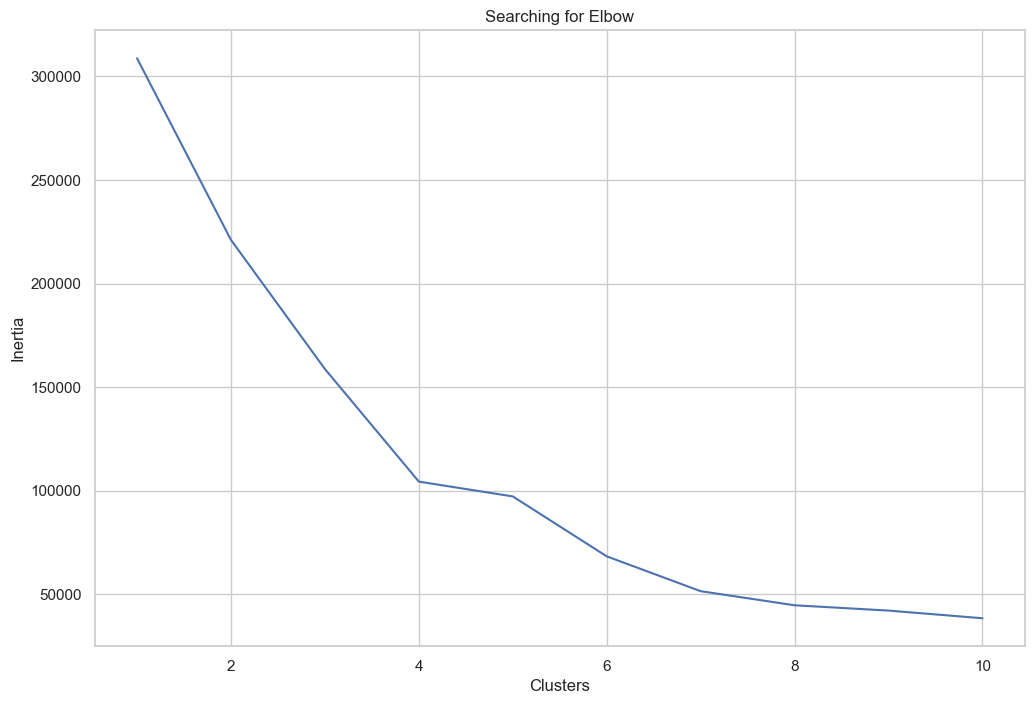

In [82]:
X = customer_set.drop(['Gender'], axis=1)

clusters = []

min_clusters = 1
max_clusters = 10

for i in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(min_clusters, max_clusters+1)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

**Висновки з завдання 9 (детальні)** 

1. Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
2. Змінну Gender видалялив, тому що вона є категорійною
Графік показує зменшення інерції зі збільшенням кількості кластерів, і відповідно до методу ліктя, ми шукаємо точку, після якої зниження інерції починає бути не таким стрімким. Ця точка зазвичай вважається «ліктем» кривоїю, можна припустити, що оптимальною кількістю кластерів для цього набору даних буде 4 або 5. Обрання одного з цих значень дозволить досягти збалансованого компромісу між кількістю кластерів і внутрішньокластерною розбіжністю, тобто інерцією


**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

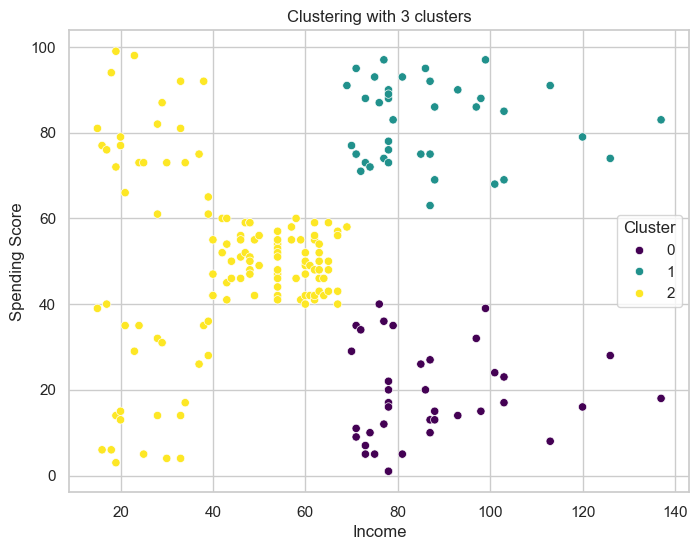

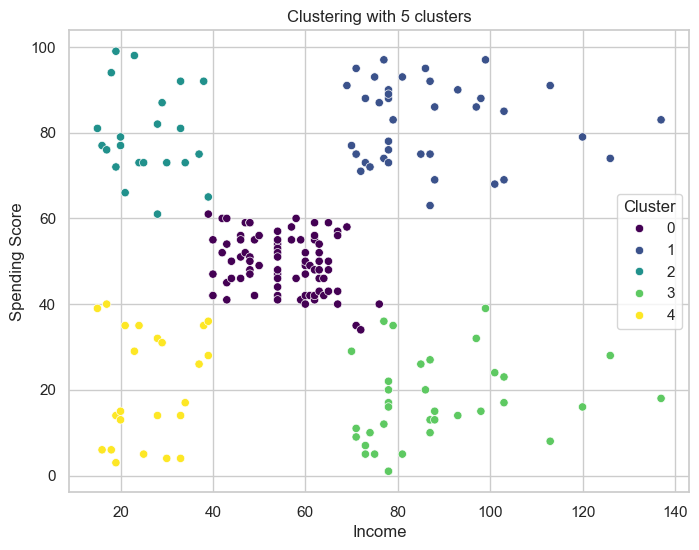

In [83]:
X = customer_set[['Income', 'SpendingScore']]

num_clusters = [3, 5]


for i, n_clusters in enumerate(num_clusters, 1):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    customer_set['Cluster'] = kmeans.labels_
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster', palette='viridis')
    plt.title(f'Clustering with {n_clusters} clusters')
    plt.xlabel('Income')
    plt.ylabel('Spending Score')
    plt.legend(title='Cluster')
    plt.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Коли кластери збільшуються з 3 до 5, ми спостерігаємо додаткове розділення у групах споживачів, що дає більш детальне уявлення про поведінку клієнтів. Використовуючи п'ять кластерів, можна виявити унікальні сегменти споживачів, такі як ті, хто мають високий дохід, але низький рівень витрат, або ті, хто мають помірний дохід, але високий рівень витрат


## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


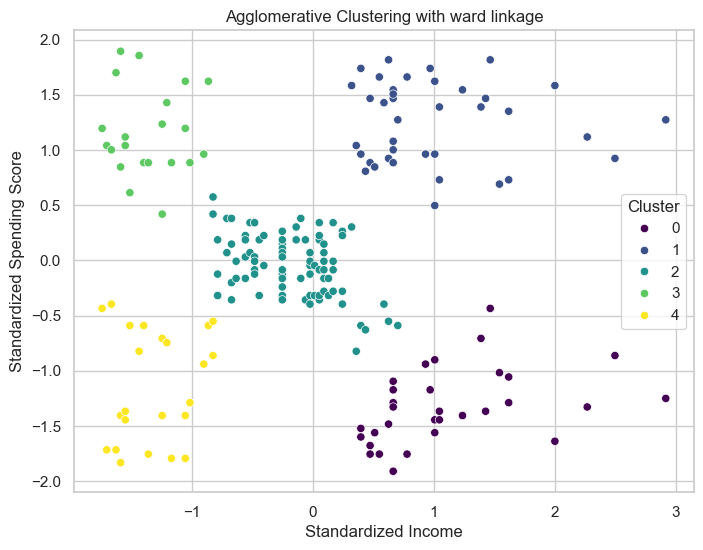

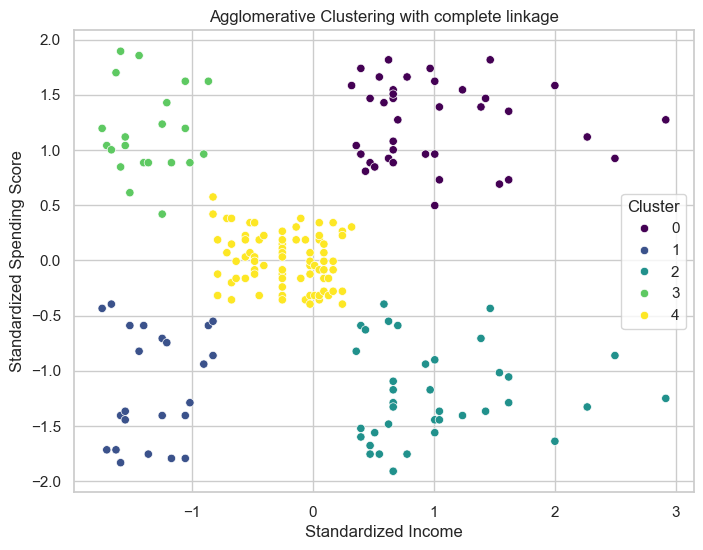

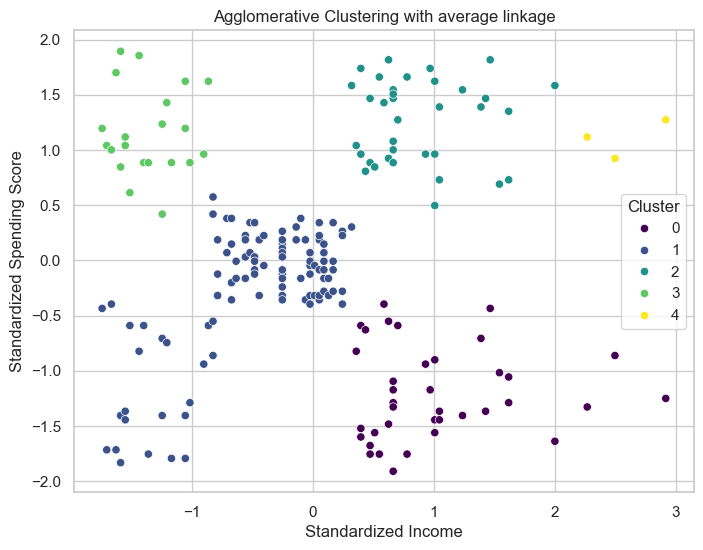

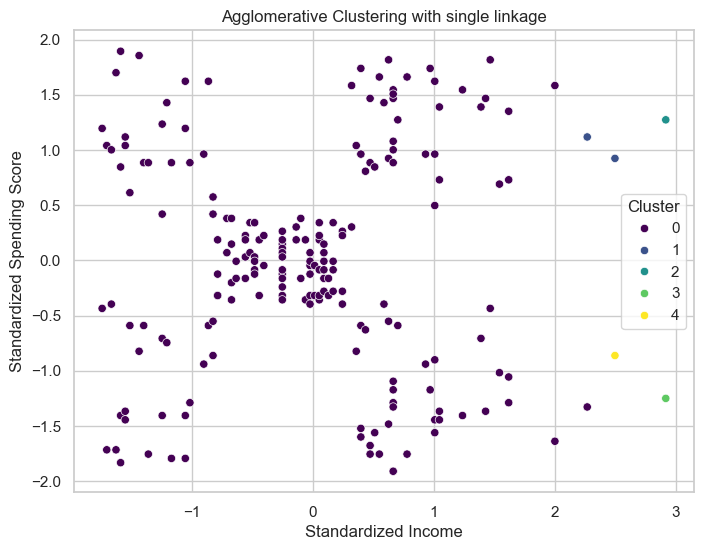

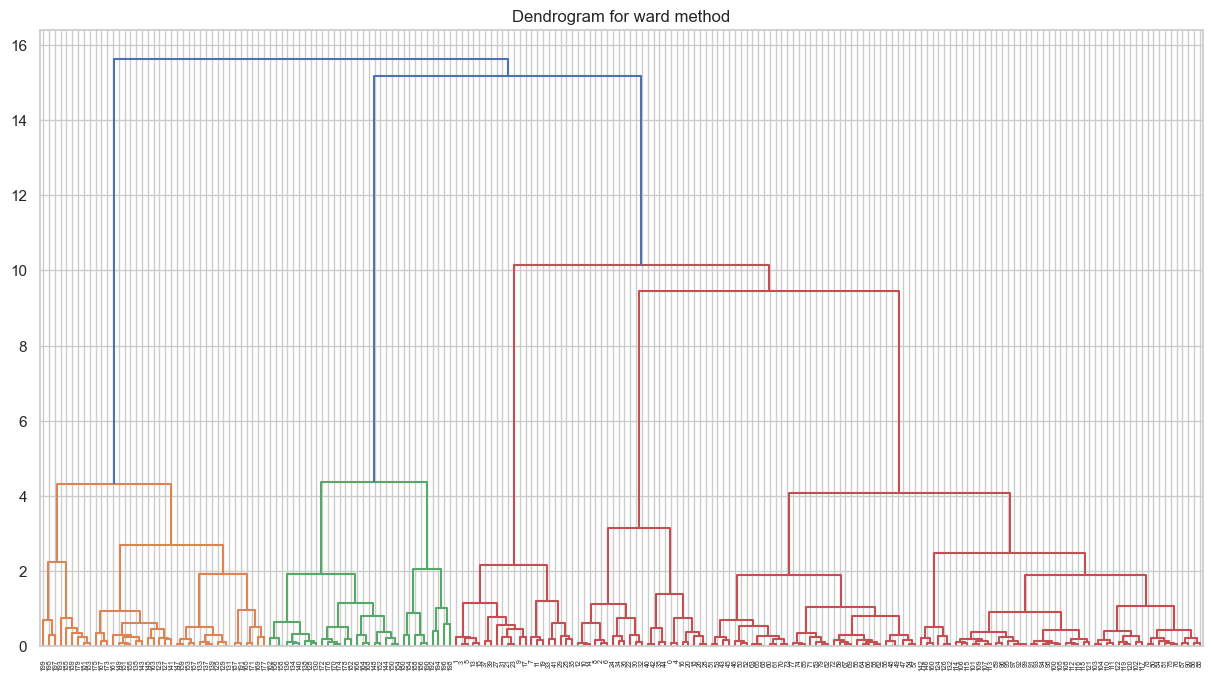

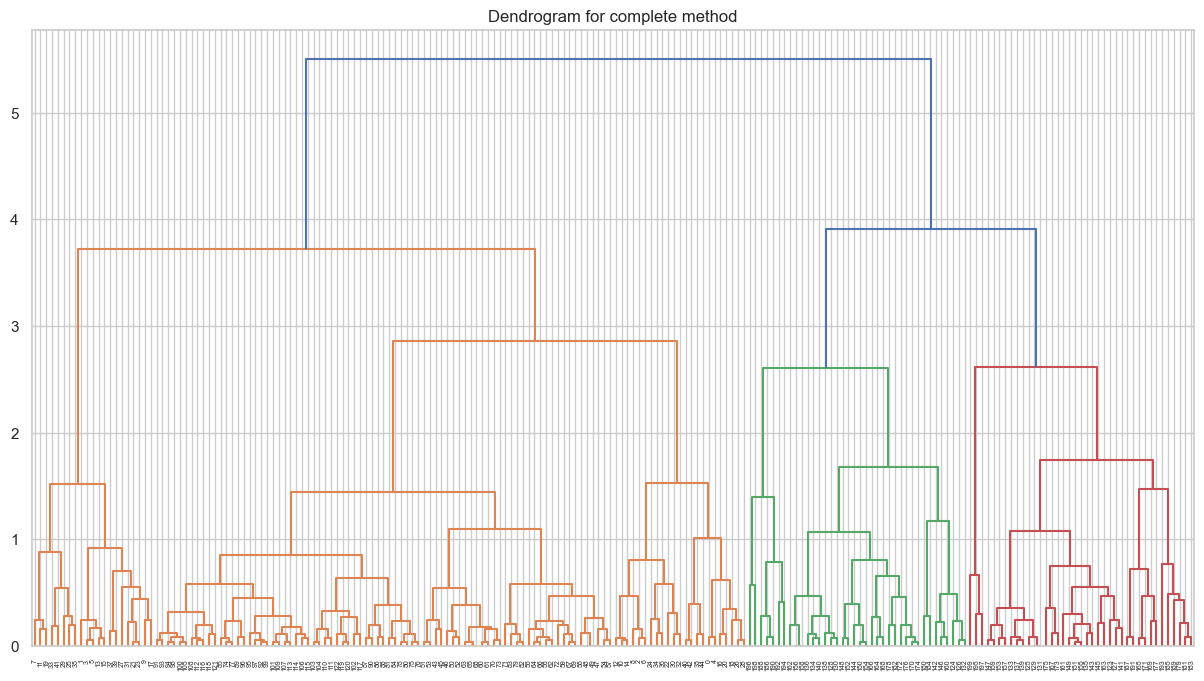

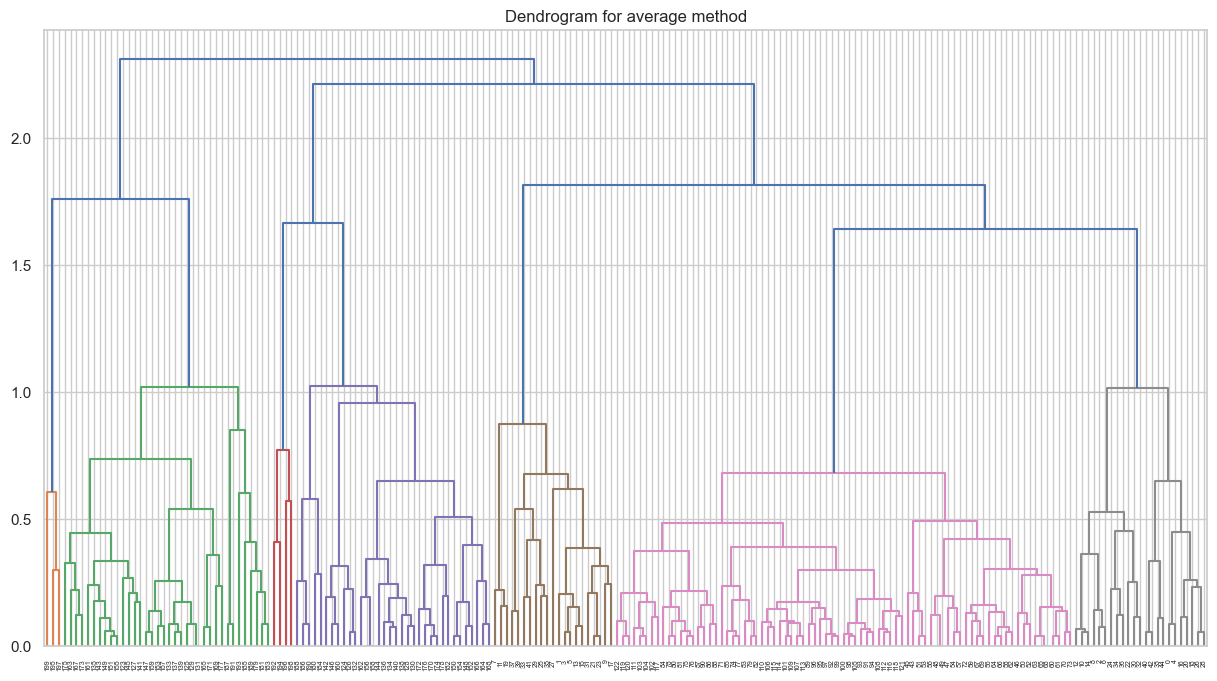

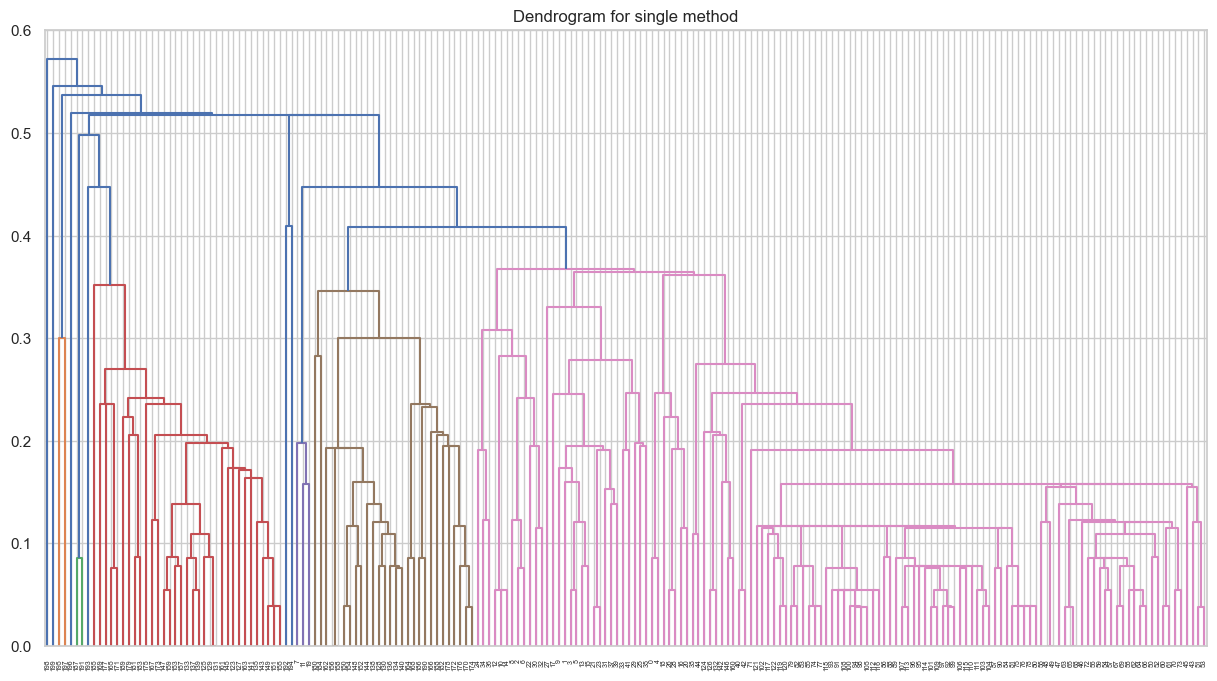

In [84]:

linkage_methods = ['ward', 'complete', 'average', 'single']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for linkage in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    clustering.fit(X_scaled)
    labels = clustering.labels_
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(f'Agglomerative Clustering with {linkage} linkage')
    plt.xlabel('Standardized Income')
    plt.ylabel('Standardized Spending Score')
    plt.legend(title='Cluster')
    plt.show()

for method in linkage_methods:
    Z = hierarchy.linkage(X_scaled, method=method)
    
    # Plotting the dendrogram
    plt.figure(figsize=(15, 8))
    plt.title(f'Dendrogram for {method} method')
    dn = hierarchy.dendrogram(Z)
    plt.show()

**Висновки з завдання 12 (детальні)**

1. На діаграмі кластеризації методом ward видно, що кластери 0, 1 і 4 мають чіткі кордони і займають свої окремі зони по доходам та витратам
2. На діаграмі з методом повного зв'язування, кластери змішані більше, ніж у методі ward. Жовтий кластер особливо великий і розтягнутий, що може вказувати на меншу точність у групуванні даних
3. На діаграмі з методом середнього зв'язку кластери виглядають більш розпорошеними і менш чітко відокремленими один від одного. Особливо один кластер є дуже маленьким порівняно з іншими, що може вказувати на нерівномірне розподілення даних між кластерами
4. На діаграмі з одиночним зв'язком кластеризація видає один домінуючий кластер, а інші кластери містять лише кілька точок. Це свідчить про високий рівень ланцюгового ефекту, де кластери формуються навколо окремих мостів між точками
5. Дендрограма для методу ward показує, що датасет можна розділити на кілька чітко відмінних груп. Великі вертикальні відстані між гілками на дендрограмі вказують на високий рівень різниці між цими кластерами
6. На дендрограмі для методу повного зв'язку видно, що кластери об'єднуються на вищому рівні відстані, що вказує на меншу схожість між ними. Великі кластери на дендрограмі свідчать про те, що кластеризація менш чутлива до відмінностей між окремими точками або невеликими групами точок
7. На цій дендрограмі для середнього методу зв'язку ми бачимо, що кластери утворюються на різних рівнях відстані, але з меншими різницями порівняно з методом ward або complete. Це вказує на більшу однорідність між кластерами і м'якіший перехід між групами точок
8. На цій дендрограмі для одиночного методу зв'язку бачимо багато дрібних гілок, які об'єднуються на низьких рівнях відстані, що свідчить про тенденцію до формування довгих і тонких кластерів. Високий рівень злиття на дендрограмі вказує на ланцюговий ефект, де кластери утворюються через послідовне додавання близьких точок.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

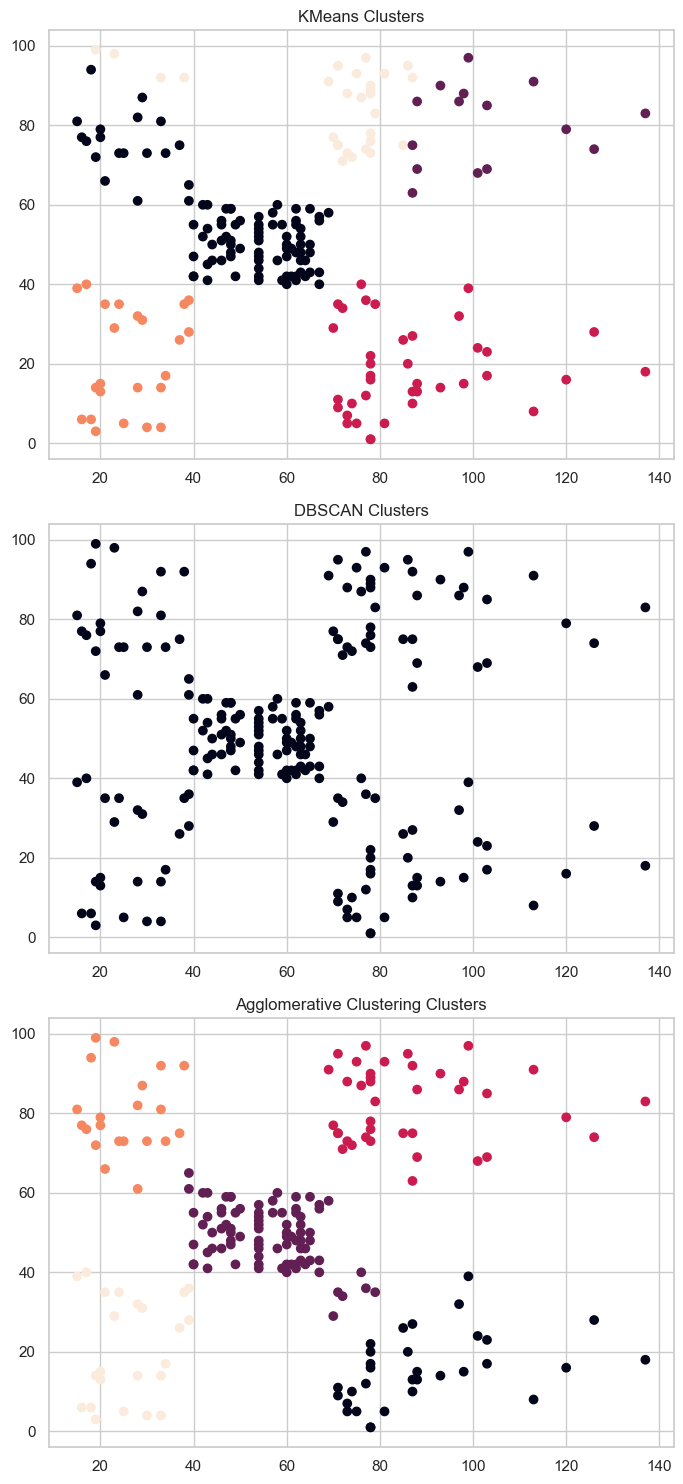

In [85]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters)
dbscan = DBSCAN(eps=0.3)
agglo = AgglomerativeClustering(n_clusters=n_clusters)

kmeans_clusters = kmeans.fit_predict(X)
dbscan_clusters = dbscan.fit_predict(X)
agglo_clusters = agglo.fit_predict(X)

X_values = X.values

fig, axs = plt.subplots(3, 1, figsize=(7, 15))  

axs[0].scatter(X_values[:, 0], X_values[:, 1], c=kmeans_clusters)
axs[0].set_title('KMeans Clusters')

axs[1].scatter(X_values[:, 0], X_values[:, 1], c=dbscan_clusters)
axs[1].set_title('DBSCAN Clusters')

axs[2].scatter(X_values[:, 0], X_values[:, 1], c=agglo_clusters)
axs[2].set_title('Agglomerative Clustering Clusters')

plt.tight_layout()
plt.show()

**Висновки з завдання 13 (детальні)**

1. На діаграмі KMeans чітко видно п'ять різних кластерів. Кожен кластер має свої особливості за рівнем доходів та витрат, що робить KMeans хорошим для визначення груп клієнтів
2. На діаграмі DBSCAN в основному виокремлюється один великий кластер, а інші точки розсіяні як викиди. DBSCAN не показав чітких кластерів для цих даних.
3. На діаграмі агломеративно кластеризаційній діаграмі видно кластери, але вони не так відокремлені, як у KMeans. Це може вказувати на те, що кластеризація є більш природною і менш структурованою.